In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [161]:
iris_dt = pd.read_csv('./data/iris_with_header.csv')
iris_dt

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [162]:
iris_dt.shape

(150, 5)

In [163]:
iris_dummies=pd.get_dummies(iris_dt,columns=['species'],dtype=int)
iris_dummies

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [164]:
iris_dum=iris_dummies[['sepal_length','sepal_width','petal_length','species_setosa','species_versicolor','species_virginica']]
iris_dum

,sepal_length,sepal_width,petal_length,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,1,0,0
1,4.9,3.0,1.4,1,0,0
2,4.7,3.2,1.3,1,0,0
3,4.6,3.1,1.5,1,0,0
4,5.0,3.6,1.4,1,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,0,0,1
146,6.3,2.5,5.0,0,0,1
147,6.5,3.0,5.2,0,0,1
148,6.2,3.4,5.4,0,0,1


In [165]:
X=iris_dum[['sepal_length','sepal_width','petal_length']]
X

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [166]:
y=iris_dum[['species_setosa','species_versicolor','species_virginica']]
y

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [167]:
X = X.values
y = y.values
y.shape

(150, 3)

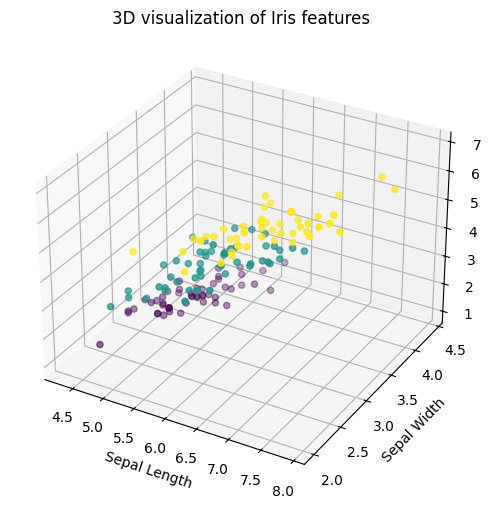

In [168]:
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# If y is one-hot encoded:
labels = y.argmax(axis=1)

ax.scatter(X[:,0], X[:,1], X[:,2], c=labels, cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D visualization of Iris features')
plt.show()

In [169]:
X_mean=np.mean(X)
X_n=X-X_mean
X_std=np.std(X)
X_norm=X_n/X_std
X_norm.shape

(150, 3)

In [170]:
X_norm=X_norm.T
X_norm.shape

(3, 150)

In [171]:
y=y.T
y.shape

(3, 150)

In [172]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [173]:
def tanh(z):
    return np.tanh(z)

In [174]:
def initpara(X,y,hl1,hl2,hl3):
    n_x=X.shape[0]
    n_y=y.shape[0]
    w1=np.random.rand(hl1,n_x)
    b1=np.random.rand(hl1,1)
    w2=np.random.rand(hl2,hl1)
    b2=np.random.rand(hl2,1)
    w3=np.random.rand(hl3,hl2)
    b3=np.random.rand(hl3,1)
    w4=np.random.rand(n_y,hl3)
    b4=np.random.rand(n_y,1)
    return w1,b1,w2,b2,w3,b3,w4,b4

In [175]:
params=initpara(X_norm,y,3,4,3)
w1,b1,w2,b2,w3,b3,w4,b4=params

In [176]:
w1.shape

(3, 3)

In [177]:
b1.shape

(3, 1)

In [178]:
w2.shape

(4, 3)

In [179]:
b2.shape

(4, 1)

In [180]:
w3.shape

(3, 4)

In [181]:
b3.shape

(3, 1)

In [182]:
w4.shape

(3, 3)

In [183]:
b4.shape

(3, 1)

In [184]:
def forw_propa(X,y,params):
    w1=params[0]
    b1=params[1]
    w2=params[2]
    b2=params[3]
    w3=params[4]
    b3=params[5]
    w4=params[6]
    b4=params[7]

    Z1=w1.dot(X)+b1
    A1=tanh(Z1)
    Z2=w2.dot(A1)+b2
    A2=tanh(Z2)
    Z3=w3.dot(A2)+b3
    A3=tanh(Z3)
    Z4=w4.dot(A3)+b4
    A4=sigmoid(Z4)

    epsilon = 1e-15  # Small value to prevent log(0)
    # Clip predictions to avoid 0 and 1
    A4 = np.clip(A4, epsilon, 1 - epsilon)

    return Z1,A1,Z2,A2,Z3,A3,Z4,A4
    

In [185]:
cache=forw_propa(X_norm,y,params)
Z1,A1,Z2,A2,Z3,A3,Z4,A4=cache

In [186]:
Z1.shape

(3, 150)

In [187]:
A1.shape

(3, 150)

In [188]:
Z2.shape

(4, 150)

In [189]:
A2.shape

(4, 150)

In [190]:
Z3.shape

(3, 150)

In [191]:
A3.shape

(3, 150)

In [192]:
Z4.shape

(3, 150)

In [193]:
A4.shape

(3, 150)

In [194]:
def costfunc(y,A4):
    m=y.shape[1]
    
    cost=-(1/m)*np.sum(y*np.log(A4)+(1-y)*np.log(1-A4))
    return cost

In [195]:
def back_propa(X,y,params,cache):

    m=y.shape[1]
    
    w1=params[0]
    b1=params[1]
    w2=params[2]
    b2=params[3]
    w3=params[4]
    b3=params[5]
    w4=params[6]
    b4=params[7]

    Z1=cache[0]
    A1=cache[1]
    Z2=cache[2]
    A2=cache[3]
    Z3=cache[4]
    A3=cache[5]
    Z4=cache[6]
    A4=cache[7]

    dZ4= A4 - y
    dw4=(1/m)*(dZ4.dot(A3.T))
    db4=(1/m)*np.sum(dZ4)

    dZ3= w4.T.dot(dZ4)*(1-A3**2)
    dw3=(1/m)*(dZ3.dot(A2.T))
    db3=(1/m)*np.sum(dZ3)

    dZ2= w3.T.dot(dZ3)*(1-A2**2)
    dw2=(1/m)*(dZ2.dot(A1.T))
    db2=(1/m)*np.sum(dZ2)

    dZ1= w2.T.dot(dZ2)*(1-A1**2)
    dw1=(1/m)*(dZ1.dot(X.T))
    db1=(1/m)*np.sum(dZ1)

    return dw4,db4,dw3,db3,dw2,db2,dw1,db1
    

In [196]:
grads=back_propa(X_norm,y,params,cache)
dw4,db4,dw3,db3,dw2,db2,dw1,db1=grads

In [197]:
dw4.shape

(3, 3)

In [198]:
db4.shape

()

In [199]:
dw3.shape

(3, 4)

In [200]:
db3.shape

()

In [201]:
dw2.shape

(4, 3)

In [202]:
db2.shape

()

In [203]:
dw1.shape

(3, 3)

In [204]:
db1.shape

()

In [205]:
def update(grads,params,learn_r):
    w1=params[0]
    b1=params[1]
    w2=params[2]
    b2=params[3]
    w3=params[4]
    b3=params[5]
    w4=params[6]
    b4=params[7]

    dw4=grads[0]
    db4=grads[1]
    dw3=grads[2]
    db3=grads[3]
    dw2=grads[4]
    db2=grads[5]
    dw1=grads[6]
    db1=grads[7]

    w1=w1-(learn_r*dw1)
    b1=b1-(learn_r*db1)
    w2=w2-(learn_r*dw2)
    b2=b2-(learn_r*db2)
    w3=w3-(learn_r*dw3)
    b3=b3-(learn_r*db3)
    w4=w4-(learn_r*dw4)
    b4=b4-(learn_r*db4)

    return w1,b1,w2,b2,w3,b3,w4,b4

In [206]:
params=update(grads,params,0.8)

In [207]:
w1.shape

(3, 3)

In [208]:
b1.shape

(3, 1)

In [209]:
w2.shape

(4, 3)

In [210]:
b2.shape

(4, 1)

In [211]:
w3.shape

(3, 4)

In [212]:
b3.shape

(3, 1)

In [213]:
w4.shape

(3, 3)

In [214]:
b4.shape

(3, 1)

In [215]:
def get_predictions(A4):
    pred = np.zeros_like(A4)
    pred[np.argmax(A4, axis=0), np.arange(A4.shape[1])] = 1
    return pred

In [216]:
pred=get_predictions(A4)
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.,

In [217]:
def get_accuracy(y_predicted, y):
    #print(y_predicted, y)
    return np.sum(y_predicted == y) / y.size

In [218]:
def train(X,y,hl1,hl2,hl3,epoch,learn_r):
    params=initpara(X_norm,y,3,4,3)
    cost_history=[]
    n_print=epoch//20
    for i in range(epoch):
        cache=forw_propa(X_norm,y,params)
        A4=cache[7]
        cost=costfunc(y,A4)
        grads=back_propa(X_norm,y,params,cache)
        params=update(grads,params,learn_r)
        cost_history.append(cost)
        
        if (i+1) % n_print == 0:
            predictions = get_predictions(A4)
            accu = get_accuracy(predictions, y)
            
            print("Iteration", i+1, " | Cost: ", cost, " | Accuracy: ", accu,"\n")


    w1=params[0]
    b1=params[1]
    w2=params[2]
    b2=params[3]
    w3=params[4]
    b3=params[5]
    w4=params[6]
    b4=params[7]

    return w1,b1,w2,b2,w3,b3,w4,b4,cost_history
            


In [219]:
w1,b1,w2,b2,w3,b3,w4,b4,cost_history=train(X_norm,y,hl1=5,hl2=4,hl3=3,epoch=7000,learn_r=0.01)

Iteration 350  | Cost:  1.3213675081176453  | Accuracy:  0.7911111111111111 

Iteration 700  | Cost:  1.1314528799806776  | Accuracy:  0.7955555555555556 

Iteration 1050  | Cost:  1.0460126184840444  | Accuracy:  0.7911111111111111 

Iteration 1400  | Cost:  0.9958088138959063  | Accuracy:  0.8088888888888889 

Iteration 1750  | Cost:  0.9621214912718142  | Accuracy:  0.8533333333333334 

Iteration 2100  | Cost:  0.9296828405917427  | Accuracy:  0.8844444444444445 

Iteration 2450  | Cost:  0.8813690538186452  | Accuracy:  0.9066666666666666 

Iteration 2800  | Cost:  0.7839653588082608  | Accuracy:  0.9644444444444444 

Iteration 3150  | Cost:  0.6314716052358756  | Accuracy:  0.9733333333333334 

Iteration 3500  | Cost:  0.4987233609763478  | Accuracy:  0.9733333333333334 

Iteration 3850  | Cost:  0.4141809878590833  | Accuracy:  0.9777777777777777 

Iteration 4200  | Cost:  0.3607382148707013  | Accuracy:  0.9777777777777777 

Iteration 4550  | Cost:  0.32457559894595356  | Accura

In [220]:
w1

array([[-0.54941474, -0.10809473,  1.79075664],
       [ 1.00214874, -0.94945075,  0.76682501],
       [-0.24403539, -0.28752231,  0.89400358]])

In [221]:
b1

array([[-0.12997939],
       [-0.1245695 ],
       [-0.15851716]])

In [222]:
w2

array([[ 0.19937711,  1.29417681,  0.53128097],
       [ 0.39796002,  1.21073045,  0.45611837],
       [ 1.7237825 , -0.02771886,  0.88883401],
       [ 1.207078  ,  0.20003919,  0.6393863 ]])

In [223]:
b2

array([[-0.05487439],
       [ 0.30936768],
       [-0.06995799],
       [-0.14856205]])

In [224]:
w3

array([[ 0.62901814, -0.05682186,  2.03850512,  1.14799673],
       [ 0.57332294,  0.27876928,  1.14722222,  0.70364129],
       [ 1.78735765,  1.53975283, -0.14295186,  0.25470045]])

In [225]:
b3

array([[-0.3149331 ],
       [-0.25480811],
       [ 0.01074083]])

In [226]:
w4

array([[-1.18982496, -1.5272876 , -3.26024148],
       [-1.99183923, -0.81598606,  2.9204438 ],
       [ 2.83248125,  1.89927451,  0.71905895]])

In [227]:
b4

array([[-2.53620263],
       [-2.44781664],
       [-2.23563759]])

Text(0, 0.5, 'Cost_value')

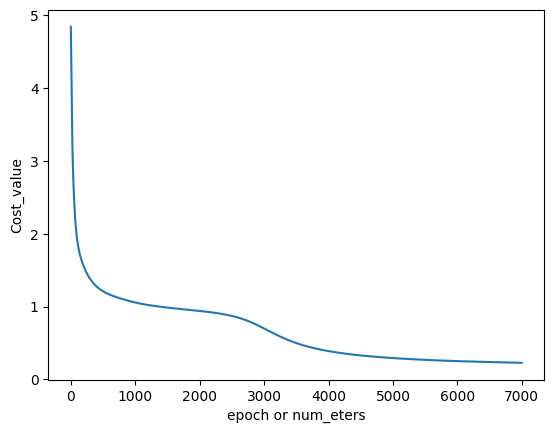

In [228]:
plt.plot(cost_history)
plt.xlabel('epoch or num_eters')
plt.ylabel('Cost_value')

3D contour not supported on some matplotlib versions: Input z must be 2D, not 3D


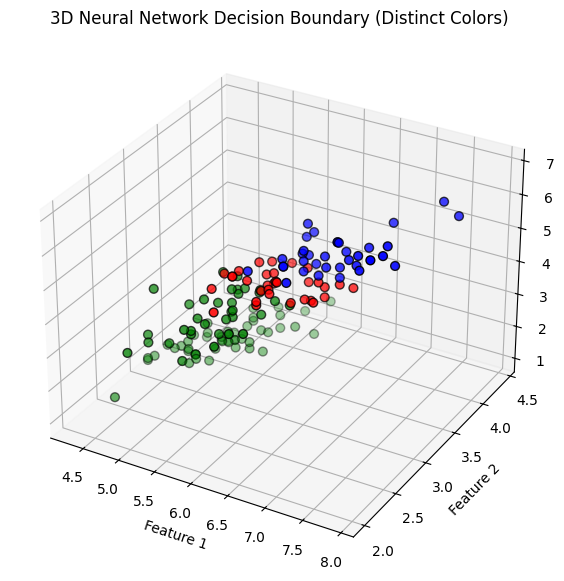

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Define distinct class colors (red, green, blue)
distinct_cmap = ListedColormap(['red', 'blue', 'green'])

# Normalize your data using the same mean and std as in training
X_norm = (X - X_mean) / X_std


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx, yy, zz = np.meshgrid(
    np.arange(x_min, x_max, 0.2),
    np.arange(y_min, y_max, 0.2),
    np.arange(z_min, z_max, 0.2)
)


grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
grid_norm = (grid_points - X_mean) / X_std


cache = forw_propa(grid_norm.T, y.T, params)
A_last = cache[-1]  # final layer output (softmax probabilities)
Z = get_predictions(A_last)


Z = np.argmax(A_last, axis=0)  # shape: (n_points,)
Z = Z.reshape(xx.shape)  


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data (colored by predicted labels)
y_pred = np.argmax(forw_propa(X_norm.T, y.T, params)[-1], axis=0)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_pred, cmap=distinct_cmap, s=40, edgecolors='k')

# 3D contour (optional)
try:
    ax.contourf(xx, yy, zz, Z, alpha=0.2, cmap=distinct_cmap)
except Exception as e:
    print("3D contour not supported on some matplotlib versions:", e)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Neural Network Decision Boundary (Distinct Colors)')

plt.show()
